In [7]:
%pip install numpy pandas scikit-learn matplotlib umap-learn plotly #instalamos librerias

In [8]:
# Procedemos a importar las librerias que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from umap import UMAP

plt.rcParams['figure.figsize'] = (6,6)



In [9]:
#cargamos el dataset de billetes desde UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
col_names = [
    'variance',
    'skewness',
    'curtosis',
    'entropy',
    'label'
] #nombres de columnas
df = pd.read_csv(url, header=None, names=col_names)
df['label'] = df['label'].astype(int)
df.head() #visualizamos las filas



,variance,skewness,curtosis,entropy,label
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
#Preprocesamiento
X = df.drop('label', axis=1).values #caracteristicas
y = df['label'].values #etiquetas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [11]:
#Reducición a 2D

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X_scaled)

umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [4]:
# Visualización
def plot_2d(X2d, labels, title):
    for lab in np.unique(labels):
        mask = labels == lab
        plt.scatter(X2d[mask,0], X2d[mask,1], label=f'Clase {lab}', alpha=0.7)
    plt.title(title)
    plt.legend()
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()



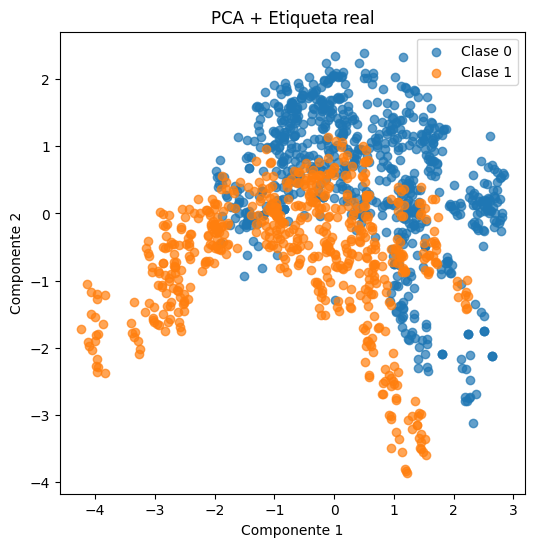

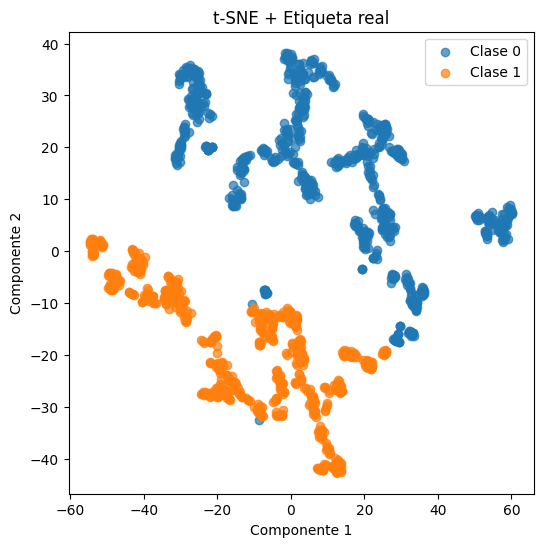

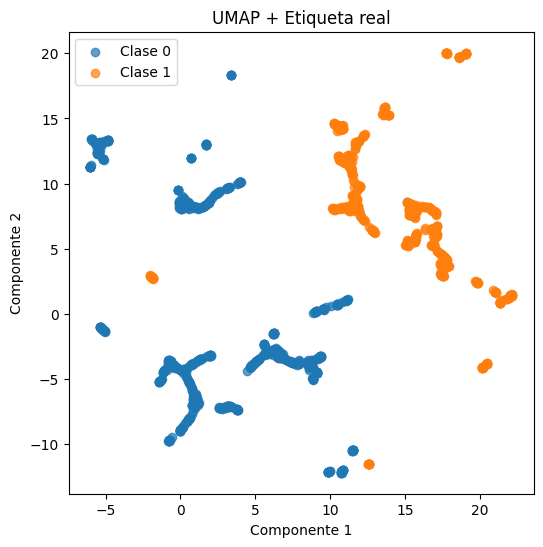

In [12]:
#Visualizamos etiquetas reales
plot_2d(X_pca, y, 'PCA + Etiqueta real')
plot_2d(X_tsne, y, 't-SNE + Etiqueta real')
plot_2d(X_umap, y, 'UMAP + Etiqueta real')



KMeans (k=2): ARI=0.013, NMI=0.011, Silhouette=0.329


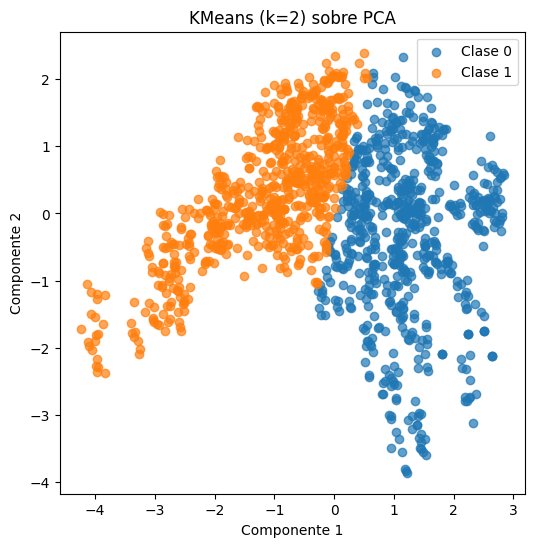

Agglomerative (2): ARI=0.035, NMI=0.051, Silhouette=0.313


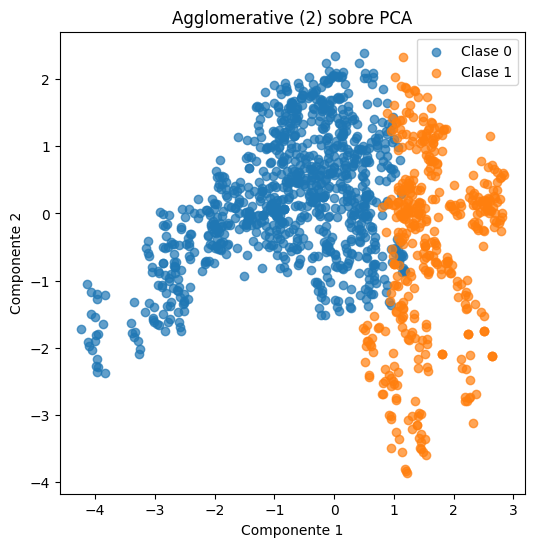

DBSCAN: ARI=0.006, NMI=0.087, Silhouette=-0.037


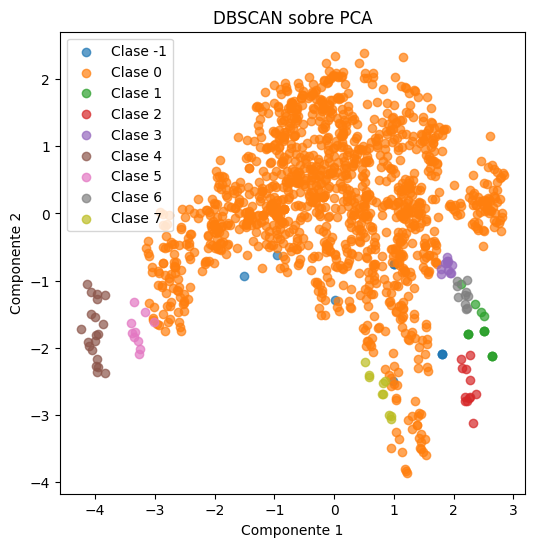

In [13]:
# Clustering y evaluación
models = {
    'KMeans (k=2)': KMeans(n_clusters=2, random_state=42),
    'Agglomerative (2)': AgglomerativeClustering(n_clusters=2),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

for name, model in models.items():
    pred = model.fit_predict(X_scaled)
    ari = adjusted_rand_score(y, pred)
    nmi = normalized_mutual_info_score(y, pred)
    sil = silhouette_score(X_scaled, pred) if len(np.unique(pred)) > 1 else float('nan')

    # Metricas:
    print(f'{name}: ARI={ari:.3f}, NMI={nmi:.3f}, Silhouette={sil:.3f}')

    plot_2d(X_pca, pred, f'{name} sobre PCA')


In [14]:
# Guardar métricas
results = []
for name, model in models.items():
    pred = model.fit_predict(X_scaled)
    results.append({
        'Método': name,
        'ARI': adjusted_rand_score(y, pred),
        'NMI': normalized_mutual_info_score(y, pred),
        'Silhouette': silhouette_score(X_scaled, pred) if len(np.unique(pred)) > 1 else float('nan')
    })

df_results = pd.DataFrame(results)
df_results.to_csv('banknote_clustering_metrics.csv', index=False)
print("Métricas exportadas a banknote_clustering_metrics.csv")

# Guardamos asignaciones de cluster en formato csv
df_assign = df.copy()
for name, model in models.items():
    df_assign[f'Cluster {name}'] = model.fit_predict(X_scaled)

df_assign.to_csv('banknote_cluster_assignments.csv', index=False)
df_assign.head()


Métricas exportadas a banknote_clustering_metrics.csv


,variance,skewness,curtosis,entropy,label,Cluster KMeans (k=2),Cluster Agglomerative (2),Cluster DBSCAN
0,3.62160,8.6661,-2.8073,-0.44699,0,0,1,0
1,4.54590,8.1674,-2.4586,-1.46210,0,0,1,0
2,3.86600,-2.6383,1.9242,0.10645,0,1,0,0
3,3.45660,9.5228,-4.0112,-3.59440,0,0,1,0
4,0.32924,-4.4552,4.5718,-0.98880,0,1,0,0
